In [1]:
!pip install SVM

  Preparing metadata (setup.py) ... done
  Created wheel for SVM: filename=svm-0.1.0-py3-none-any.whl size=3466 sha256=9fe231929309a898807fc47efd0fbb920813a2df5d97f6b0864694564deb91c8
  Stored in directory: /root/.cache/pip/wheels/dc/0a/16/c3cfc069f00231db8d16bc70bc747c155395dbd30843a61957
Successfully built SVM


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re  # used for pattern matching and text manipulation.
import string
import nltk #a powerful library for working with human language data.
from nltk.corpus import stopwords #for cleaning
from nltk.stem import LancasterStemmer ##for cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [4]:
train_path="/content/train_data.txt"
train_data = pd.read_csv(train_path,sep=":::",names=["TITLE","GENRE","DESCRIPTION"],engine="python")

In [5]:
train_data

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
7931,Fierce Light: When Spirit Meets Action (2008),documentary,Fueled by the belief that another world is po...
7932,Le temple des phénix (2012),documentary,"Around the Masaya Volcano in Nicaragua, life ..."
7933,"""Craigslist Therapist"" (2016)",comedy,"Facing a divorce and financial ruin, Steven W..."
7934,I diafanoidi vengono da Marte (1966),sci-fi,"In the 21st century, aliens (weird, green, li..."


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7935 entries, 1 to 7935
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        7935 non-null   object
 1   GENRE        7935 non-null   object
 2   DESCRIPTION  7935 non-null   object
dtypes: object(3)
memory usage: 248.0+ KB


In [7]:
train_data.describe()

,TITLE,GENRE,DESCRIPTION
count,7935,7935,7935
unique,7935,27,7931
top,Oscar et la dame rose (2009),drama,Award of the American academy of cinematograp...
freq,1,1967,3


In [8]:
train_data.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [12]:
train_path="/content/test_data.txt"
test_data = pd.read_csv(train_path,sep=":::",names=["TITLE","DESCRIPTION"],engine="python")

In [13]:
test_data

,TITLE,DESCRIPTION
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...
40911,R2 y el caso del cádaver sin cabeza (2005),Well-known Latin funnyman Javier Gurruchagaen...
40912,On aura tout vu (1976),An advertising photographer (Francois) has ag...
40913,"The Idealist: James Beveridge, Film Guru (200...",A POV documentary exploring the life and work...
40914,Tata Sol (2016),Eight days after she immigrated to Israel fro...


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40915 entries, 1 to 40915
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        40915 non-null  object
 1   DESCRIPTION  40915 non-null  object
dtypes: object(2)
memory usage: 958.9+ KB


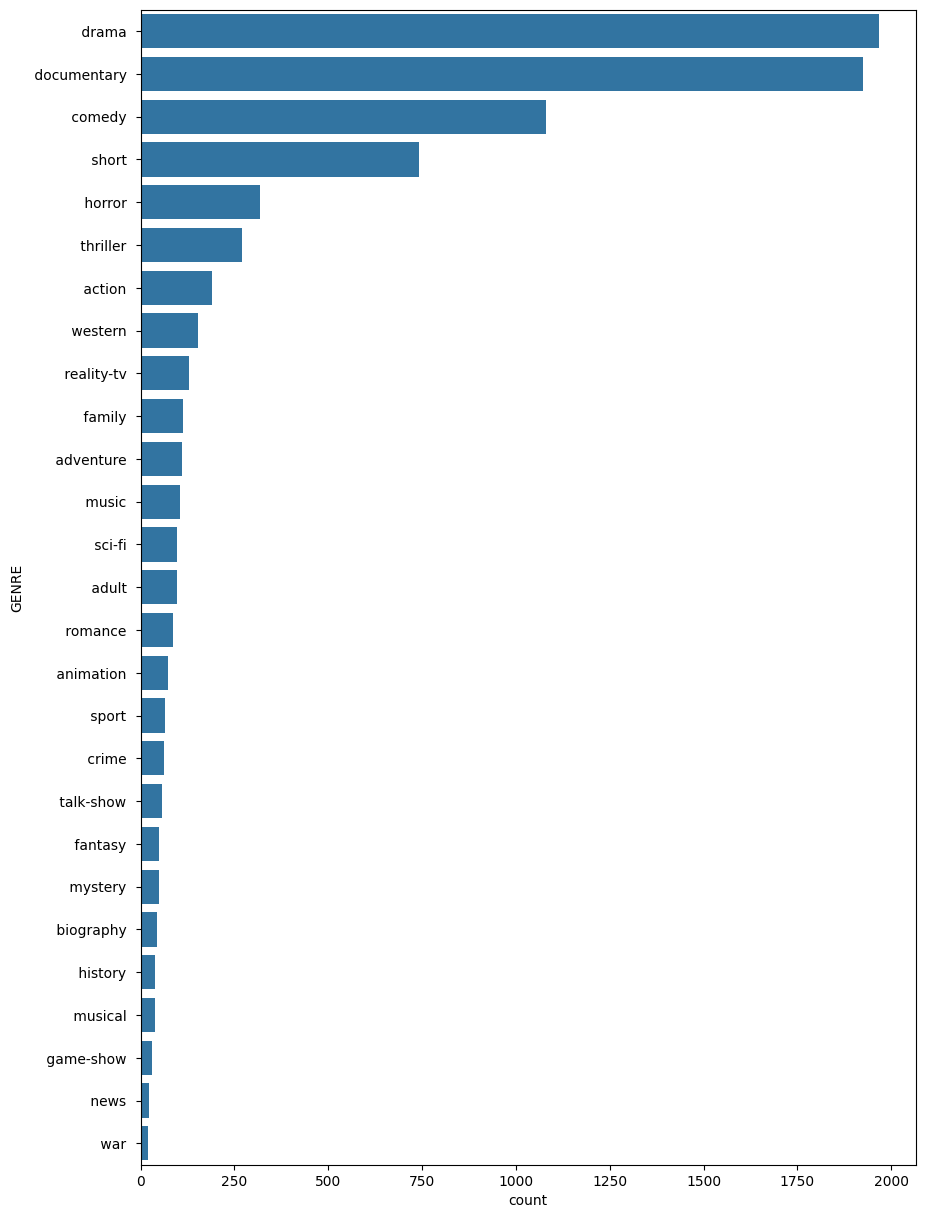

In [15]:
plt.figure(figsize=(10,15))
sns.countplot(data=train_data, y="GENRE", order= train_data["GENRE"].value_counts().index)
plt.show()

<ipython-input-16-0b66991f0745>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x="GENRE", order= train_data["GENRE"].value_counts().index, palette = "YlGnBu")


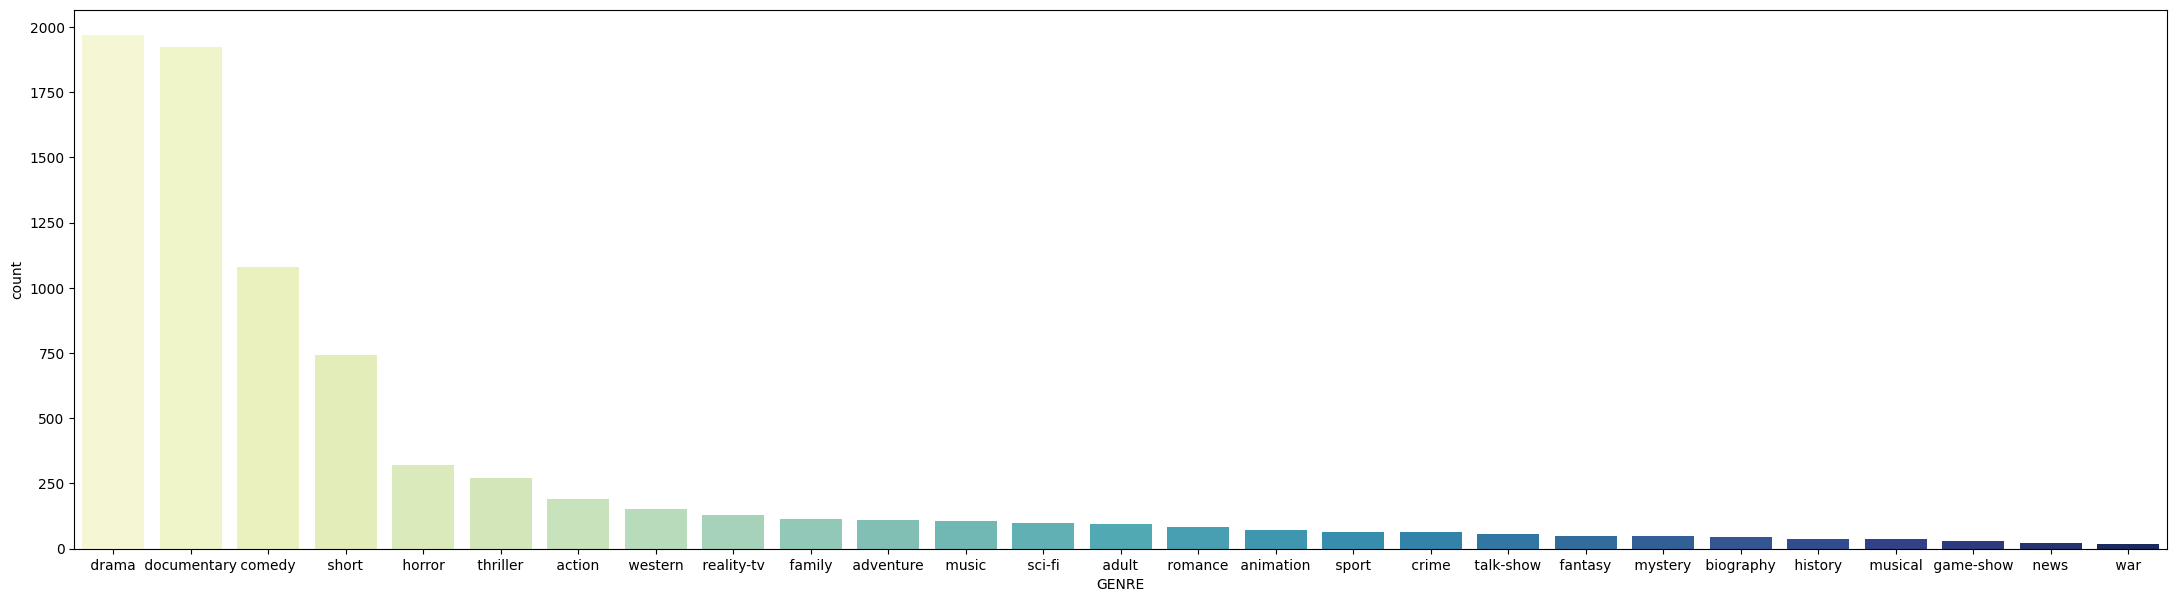

In [16]:
plt.figure(figsize=(27,7))
sns.countplot(data=train_data, x="GENRE", order= train_data["GENRE"].value_counts().index, palette = "YlGnBu")
plt.show()

In [23]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import re
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))  # Stopwords set

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)  # Change to replace non-characters with a space
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text

train_data["TextCleaning"] = train_data["DESCRIPTION"].apply(cleaning_data)
test_data["TextCleaning"] = test_data["DESCRIPTION"].apply(cleaning_data)

In [25]:
train_data

,TITLE,GENRE,DESCRIPTION,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...
...,...,...,...,...
7931,Fierce Light: When Spirit Meets Action (2008),documentary,Fueled by the belief that another world is po...,fueled belief another world possible acclaimed...
7932,Le temple des phénix (2012),documentary,"Around the Masaya Volcano in Nicaragua, life ...",around masaya volcano nicaragua life struggled...
7933,"""Craigslist Therapist"" (2016)",comedy,"Facing a divorce and financial ruin, Steven W...",facing divorce financial ruin steven wellish f...
7934,I diafanoidi vengono da Marte (1966),sci-fi,"In the 21st century, aliens (weird, green, li...",century aliens weird green lights sometimes ma...


In [26]:
vectorize = TfidfVectorizer()

X_train = vectorize.fit_transform(train_data["TextCleaning"])

X_test = vectorize.transform(test_data["TextCleaning"])


In [27]:
X = X_train
y = train_data["GENRE"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [28]:
model = SVC()
model.fit(X_train, Y_train)

SVC()

In [29]:
model.score(X_train, Y_train)

0.879174543163201

In [30]:
y_pred = model.predict(X_test)
y_pred

array([' documentary ', ' documentary ', ' documentary ', ...,
       ' documentary ', ' documentary ', ' drama '], dtype=object)

In [31]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.4788909892879647
